# Preparing Dataset

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people
def createIRIS():
    data=datasets.load_iris()
    U=pd.DataFrame(data["data"],columns=data["feature_names"])
    labels=pd.Series(data["target_names"])
    U["target"]=data["target"]
    U["label"]= [labels[i] for i in data["target"]]
    return U

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data3 = pd.read_csv("../Learning Test/heart_failure.csv")
data3.sample(10)
X=StandardScaler().fit_transform(data3[data3.columns[:-1]])
Y=data3[data3.columns[-1]]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.2)

# I Deriving Neural Network
$\DeclareMathOperator {\Diag}{Diag}$
## 1.Notations & Definitions
### a. Experience
- We will denote by $\mathbb{1}_i \in \mathbb{R}^i $ the vector of ones $\forall i \in \mathbb{N}$ 
- $\mathscr{A}\left(E,F\right)$ is the set of affine transformations between $E$ and $F$
- Let $m=d_1$ the number of features.
- Let $n \in \mathbb{N}^*$ the number of samples
- Let $X \in E^n$ be a tuple of input samples 
- Let $k=d_L$ the number of classes of the output
- Let $y \in \{0,k-1\}^n$ be a tuple of samples 
- Let $Y_i=(\delta_{s,y_i})_{s\in\{1,\dots,k\}}\forall i \in \{1,\dots,n\}$ the representation of each ouput on the neural network
### b. Neural network
- Let $L\in \mathbb{N}_{\ge 2}$ be the number of all layers
- Let $d_1,\dots,d_{L}$ be the dimension of the respective layer
- Let $E_i=\mathbb{R}^{d_i}$
- Let $\mathscr{A}_i=\mathscr{A}\left(E_{i-1},E_i\right),i\in\left\{2,\dots,L\right\}$
- Let $\phi_i \in \mathscr{C}^1\left(E_i,E_i\right) \forall i \in \{2,\dots,L\}$ be a series of activation functions with $\phi_L$ a cumulative distribution function so that the final output can be interpreted as a probability
- Let $\mathscr{K}=\prod_{i=2}^L\mathscr{A}_i$ the vector space in which the parameters vary
- Let $\Psi\in \mathscr{C}^1\left(\mathscr{K}\times E_1,E_L\right)/$
$$\forall \boldsymbol{T}=(T_2,\dots,T_L),\in\mathscr{K},\forall u \in E_1,\quad\Psi(\boldsymbol{T},u)=\left(\bigcirc_{i=0}^{L-2}\phi_{L-i}\circ T_{L-i}\right)(u)$$
- Let $C \in \mathbb{R}_+$ be a hyperparameter
- Let $\mathscr{N}=\lVert\cdot\rVert$ be a norm on $\mathscr{K}$
- Let $\mathscr{l}\in \mathscr{F}\left([0,1]^{k}\times [0,1]^{k},\mathbb{R}\right)$ the unit cost function
- Let $\mathscr{L} \in \mathscr{F}\left(\mathscr{K},\mathbb{R}\right)$ the cost function for this experience:
$$\forall \boldsymbol{T} \in \mathscr{K},\quad \mathscr{L}(\boldsymbol{T})=C\sum_{i=1}^{n}\mathscr{l}\left(\Psi(\boldsymbol{T},X_i),Y_i\right)+\lVert \boldsymbol{T}\rVert$$
- For each vector $X_i,i \in \{1,\dots,n\}$, We will denote by $\left(^{(i)}a^{(j)}\right)_{j\in\{1,\dots,L\}}$ and $\left(^{(i)}z^{(j)}\right)_{j\in\{1,\dots,L\}}$ the following sequences:
$$\begin{cases}^{(i)}a^{(1)}= ^{(i)}z^{(1)}=X_i \\ 
^{(i)}a^{(j)} = \phi_i\left(^{(i)}z^{(j)}\right) \\
^{(i)}z^{(j)} = T_i\left(^{(i)}a^{(j-1)}\right)
\end{cases}$$
- We will use as a notation $\dfrac{\partial f}{\partial u}\left(u_0\right)=J_f\left(u_0\right)$
- We will denote a neural network any tuple $\mathcal{N}=\left(\boldsymbol{E},\boldsymbol{T},\boldsymbol{\phi}\right)$, where: $$\begin{cases} 
\boldsymbol{E}=\left(E_1,\dots,E_L\right) \\
\boldsymbol{\phi}=\left(\phi_2,\dots,\phi_L\right)
\end{cases}
$$
## 2. Objective
We will try to find: $$\boldsymbol{T}_*=\arg\min_{\boldsymbol{T}\in \mathscr{K}} \mathscr{L}(\boldsymbol{T})$$
## 3. Strategy
The problem maybe too hard to crack globally, So assuming that $\Phi$ is a $\mathscr{C}^1$ function, we will fix a $\boldsymbol{T}_0\in \mathscr{K}$ and try to find a local minimum close to $\boldsymbol{T}_0$
## 4. Backtracking
Let $i\in\{1,\cdots,n\},j\in \{2,\cdots,L\}$
We have the following identities:
1. $$ \dfrac{\partial a^{(j)}}{\partial z^{(j)}} =  \dfrac{\partial \phi_j(z^{(j)})}{\partial z^{(j)}} = \dfrac{\partial \phi_j}{\partial z^{(j)}}$$
2. $$ \dfrac{\partial z^{(j)}}{\partial a^{(j-1)}}= \dfrac{\partial \left(T_j(a^{(j-1)})\right)}{\partial a^{(j-1)}}=\dfrac{\partial \left(f_j(a^{(j-1)})+b_j\right)}{\partial a^{(j-1)}}=\dfrac{\partial f_j}{\partial a^{(j-1)}}=f_j \quad \text{where }
\begin{cases} f_j=T_j-b_j \in \mathscr{L}\left(E_{j-1},E_j\right) \\ b_j=T_j(0)
\end{cases}$$ 
3. $$ \dfrac{\partial z^{(j)}}{\partial f_j}= \dfrac{\partial \left(f_j(z^{(j-1)})+b_j\right)}{\partial f_j}=\dfrac{\partial \left(f_j(a^{(j-1)})\right)}{\partial f_j} = \begin{pmatrix}
(a^{(j-1)})^T & \cdots & \cdots & \boldsymbol{0}_{E_{j-1}}^T\\
\boldsymbol{0}_{E_{j-1}}^T &  (a^{(j-1)})^T & \cdots & \boldsymbol{0}_{E_{j-1}}^T\\
\vdots & \vdots & \ddots  & \boldsymbol{0}_{E_{j-1}}^T\\
\boldsymbol{0}_{E_{j-1}}^T & \cdots & \cdots & (a^{(j-1)})^T
\end{pmatrix} $$
4. $$ \dfrac{\partial z^{(j)}}{\partial b_j}= \dfrac{\partial \left(f_j(a^{(j-1)})+b_j\right)}{\partial b_j}= I_{d_j} $$
5. $$\dfrac{\partial z^{(j)}}{\partial T_j} = 
\begin{pmatrix}
\dfrac{\partial z^{(j)}}{\partial f_j} & \dfrac{\partial z^{(j)}}{\partial b_j}
\end{pmatrix}=
 \begin{pmatrix}
(a^{(j-1)})^T & \cdots & \cdots & \boldsymbol{0}_{E_{j-1}}^T & 1 & 0 & \cdots & 0\\
\boldsymbol{0}_{E_{j-1}}^T &  (a^{(j-1)})^T & \cdots & \boldsymbol{0}_{E_{j-1}}^T & 0 &1 & \cdots & 0\\
\vdots & \vdots & \ddots  & \boldsymbol{0}_{E_{j-1}}^T & \vdots & \vdots & \ddots & \vdots & \\
\boldsymbol{0}_{E_{j-1}}^T & \cdots & \cdots & (a^{(j-1)})^T & 0 & \cdots & \cdots & 1
\end{pmatrix}$$

## 5. Exemples of Activation Functions & Cost Function

### 5.1.  Cost function:
A widely used unit cost function is the cross-entropy loss function
$$ \mathscr{l}(u,v)= \lVert-v\odot \ln(u)- (\mathbb{1}-v)\odot \ln(\mathbb{1}-u)\rVert_1 = \sum_{i=1}^{k}-v_i\ln(u_i)- (1-v_i)\ln(1-u_i)$$
The cost function is then:
$$ \mathscr{L}(\boldsymbol{T})=C\sum_{i=1}^{n}\mathscr{l}\left(\Psi(\boldsymbol{T},X_i),Y_i\right)+\lVert \boldsymbol{T}\rVert = C\sum_{i=1}^{n}\sum_{j=1}^{k}-Y_{i,j}\ln(\Psi(\boldsymbol{T},X_i))_j- (1-Y_{i,j})\ln(1-\Psi(\boldsymbol{T},X_i))_j+\lVert \boldsymbol{T}\rVert   $$
### 5.2 Activation functions & their jacobians:
Here raising a vector to an exponent is done element wise.
1. Hyperbolic tangent $\phi_j=\tanh$ applied element-wise:
$$ \dfrac{\partial a^{(j)}}{\partial z^{(j)}} = \dfrac{\partial \phi_j}{\partial z^{(j)}}= \Diag\left(\phi_j'(z^{(j)})\right)=\Diag\left(\mathbb{1}-\left(\phi(z^{(j)})\odot\phi(z^{(j)})\right)\right)=\Diag\left(\mathbb{1}-\left(\phi(z^{(j)})^2\right)\right)=\Diag\left(\mathbb{1}-\left((a^{(j)})^2\right)\right)$$
2. Logistic function $\phi_j=\sigma$ applied element-wise: 
$$ \dfrac{\partial a^{(j)}}{\partial z^{(j)}} = \dfrac{\partial \phi_j}{\partial z^{(j)}}= \Diag\left(\phi_j'(z^{(j)})\right)=\Diag\left(\sigma(z^{(j)})\odot\left(\mathbb{1}-\sigma(z^{(j)})\right) \right)=\Diag\left(a^{(j)}\odot\left(\mathbb{1}-a^{(j)}\right) \right)$$£

3. Guassian function $\phi_j=g=e^{-x^2}$:
$$ \dfrac{\partial a^{(j)}}{\partial z^{(j)}} = \dfrac{\partial \phi_j}{\partial z^{(j)}}= \Diag\left(g'(z^{(j)})\right)=-2\Diag\left(z^{(j)}\odot g\left(z^{(j)}\right)\right)=-2\Diag\left(z^{(j)} \odot a^{(j)} \right)$$

### 5.3 Cumulative Distribution functions:
Note that every CDF can be used as an activation function
1. Logistic function $\sigma$

# II. Implementing Neural Network
For simplicity, the implemenatation will use only one activation function: $\sigma$
## 1. Creating Neural Network Class

In [159]:
from scipy.optimize import minimize
from scipy.special import xlogy
def sigmoid(x):
    return 1/(1+np.exp(-x))

class ActivationFunction:
    def __init__(self,f,df):
        self.f=f
        self.df=df
    pass

logistic_function=ActivationFunction(sigmoid,lambda x:sigmoid(x)*(1-sigmoid(x)))
identity_function=ActivationFunction(lambda x:x,lambda x:1)
guassian_function=ActivationFunction(lambda x:np.exp(-x**2),lambda x:-2*x*np.exp(-x**2))
tanh_function=ActivationFunction(lambda x:np.tanh(x),lambda x:1-np.tanh(x)**2)
ReLU_function=ActivationFunction(lambda x:np.maximum(x,0),lambda x:(x>0)*1)
Softsign_function=ActivationFunction(lambda x:x/(1+np.abs(x)),lambda x:1/(1+np.abs(x))**2)

class NeuralNetworkDesigner:
    def __init__(self,x_dim,y_dim):
        x_dim=int(x_dim)
        y_dim=int(y_dim)
        self.design=[x_dim]
        self.activation_functions=[]
        self.y_dim=y_dim

#Adding hidden layer
    def add_layer(self,dim,act=logistic_function):
        self.design.append(dim)
        self.activation_functions.append(act)
        return self
    
#Adding final layer 
    def close_network(self,act=logistic_function):
        self.design.append(self.y_dim)
        self.activation_functions.append(act)
    
#Reshaping a vector according to the design
    def reshape(self,U):
        design=self.design
        M=[]
        k=0
        b=[]
        for i in range(len(design)-1):
            M.append(np.reshape(U[k:k+design[i]*design[i+1]],[design[i+1],design[i]]))
            k=k+design[i]*design[i+1]
            b.append(U[k:k+design[i+1]])
            k=k+design[i+1]            
        return M,b

#flattening according to the design    
    def flatten(self,M,b):
        design=self.design
        S=np.array(design)
        s=np.sum(S[:-1]*S[1:])
        r=np.sum(S[1:])
        U=np.zeros(s+r)
        k=0
        for i in range(len(design)-1):
            U[k:k+design[i]*design[i+1]]=np.ndarray.flatten(M[i])
            k=k+design[i]*design[i+1]
            U[k:k+design[i+1]]=b[i]
            k=k+design[i+1]
        return U
    
    def flattened_dimension(self):
        S=np.array(self.design)
        return np.sum(S[:-1]*S[1:])+np.sum(S[1:])
    def xdim(self):
        return self.design[0]
    def ydim(self):
        return self.y_dim
    pass

class NeuralNetwork:
    def __init__(self, designer,C=1):
        self.M=[]
        self.designer=designer
        self.design=self.designer.design
        self.b=[]
        self.C=C
        self.L=len(self.design)
        for i in range(self.L-1):
            self.M.append(np.random.normal(0,1,[self.design[i+1],self.design[i]]))
            self.b.append(np.random.normal(0,1,[self.design[i+1]]))
    
    def _predict_1(self,x):
        a = self.decision_function_1(x)
        return np.argmax(a,axis=0)
    
    def predict(self,X):
        return np.apply_along_axis(self._predict_1,arr=X.T,axis=0)
    
    def _unit_cost(self,u,w=None,retJac=False):
        y=u[-1]
        x=u[:-1]
        M,b=self.designer.reshape(w)
        a=[x]
        z=[x]
        act_functions=self.designer.activation_functions
        for i in range(0,self.L-1):
            z.append(M[i]@a[i]+b[i])
            a.append(act_functions[i].f(z[-1]))
        k=self.designer.ydim()
        v=np.zeros(k)
        v[int(y)]=1
        v_predicted=a[-1]
        l=-xlogy(v,v_predicted)-xlogy(1-v,1-v_predicted)
        if not retJac:
            return np.sum(l)
        
        chain = (-v/a[-1]+(1-v)/(1-a[-1]))
        k=self.designer.flattened_dimension()
        jac=np.zeros([1,k])
        design=self.designer.design
        for i in range(self.L-1,0,-1):
            chain=chain@np.diag(act_functions[i-1].df(z[i]))
            k=k-design[i]
            jac[0,k:k+design[i]]=chain
            k=k-design[i]*design[i-1]        
            J=np.zeros([design[i],design[i]*design[i-1]])
            for j in range(0,design[i]):
                J[j,j*design[i-1] : (j+1)*design[i-1]]=a[i-1].T
            jac[0,k:k+design[i-1]*design[i]]=chain@J
            chain=chain@M[i-1]
        return np.sum(l),jac
    
    def cost(self,X,Y,w=None,retJac=False):
        if w is None:
            w=nn.flattened_parameters()
        S=self.designer.ydim()*X.shape[0]
        R=np.apply_along_axis(lambda u,w:self._unit_cost(u,w,retJac=retJac),arr=np.c_[X,Y],axis=1,w=w)
        L2=np.linalg.norm(w)
        if not retJac:
            return (self.C*np.sum(R)+L2)/S
        L=self.C*np.sum(R[:,0])+L2
        jac=np.ndarray.flatten(self.C*np.sum(R[:,1],axis=-1)+w.T/L2)
        return L/S,jac/S
    
    def fit(self,X,Y):
        self.M,self.b=self.designer.reshape(minimize(lambda w:self.cost(X,Y,w,retJac=True),
                                      x0= self.designer.flatten(self.M,self.b),jac=True).x)
        return self
    
    def decision_function_1(self,x):
        y=x
        for i in range(0,self.L-1):
            y=self.designer.activation_functions[i].f(self.M[i]@y+self.b[i])
        return y
    
    def decision_function(self,X):
        return np.apply_along_axis(self.decision_function_1,arr=X,axis=1)
    
    def parameters(self):
        return self.M,self.b
    
    def flattened_parameters(self):
        return self.designer.flatten(self.M,self.b)
    
    def score(self,X,Y):
        return (self.predict(X)==Y).mean()
    pass
        
        
        

## 2. Creating Neural Network

In [160]:
designer = NeuralNetworkDesigner(X.shape[1],2)
designer.add_layer(4,Softsign_function)
designer.close_network()
nn=NeuralNetwork(designer,C=1)
T=nn.flattened_parameters()

## 3. Verifying Gradient

In [161]:
from scipy.optimize import check_grad
checker= check_grad(lambda T: nn.cost(X,Y,T),x0=designer.flatten(nn.M,nn.b),grad=lambda T: nn.cost(X,Y,T,retJac=True)[1])
print("Euclidean distance between given gradient and the approximated gradient using finite difference:\n{}".format(checker))

C:\Users\Rami Zouari\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Euclidean distance between given gradient and the approximated gradient using finite difference:
8.531313485259519e-08


## 4. Training

In [162]:
oldCost,oldJac=nn.cost(X_train,Y_train,retJac=True)
print("Cost Before training: {}".format(oldCost))
print("Gradient Norm Before training: {}".format(np.linalg.norm(oldJac)))
nn.fit(X_train,Y_train)
T=nn.flattened_parameters()

newCost,newJac=nn.cost(X_train,Y_train,retJac=True)
print("Cost After training: {}".format(newCost))
print("Gradient Norm After training: {}".format(np.linalg.norm(newJac)))


Cost Before training: 1.2362840220079174
Gradient Norm Before training: 0.370055695670829
Cost After training: 0.24124689632864113
Gradient Norm After training: 3.6016216071157794e-05


## 5. Evaluating Model

In [163]:
print("Checking Accuarcy")
print("Training Accuarcy {}".format(nn.score(X_train,Y_train)))
print("Testing Accuarcy {}".format(nn.score(X_test,Y_test)))

Checking Accuarcy
Training Accuarcy 0.899581589958159
Testing Accuarcy 0.75


Text(0.5, 1.0, 'Confusion Matrix of the model')

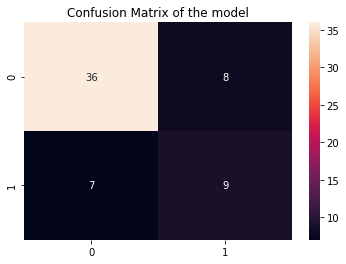

In [164]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,nn.predict(X_test)),annot=True)
plt.title("Confusion Matrix of the model")

## 6. Model Parameters

In [165]:
T

array([ 1.17200869,  3.11232378, -0.45802694,  1.05282859, -4.45476861,
        2.0372838 ,  0.03368292, -4.20076224,  3.86447848,  0.07544178,
       -1.49036502, -1.39150779,  4.13778607, -0.36321906, -2.18578804,
       -2.05963823, -0.8922495 , -0.54592468, -0.4797148 ,  1.83636456,
       -2.9312274 , -0.19290122,  0.18471451, -5.26957774,  1.95666085,
        0.41708331, -0.38802881,  0.6930646 , -1.7838974 , -2.38827759,
        2.79841561,  4.52069395,  1.09817345,  0.93894753, -1.31121773,
       -5.03404712,  1.46853178,  2.28488582, -3.19875111, -0.6979512 ,
       -1.13473024, -0.55120783,  2.43311562, -4.7289156 ,  2.76216201,
        1.64761146, -0.99676963,  0.10303871, -1.53112036, -4.67790006,
       -2.15248378,  2.68155062, -2.81097492, -2.24331968, -1.943958  ,
        3.25150868,  2.81292193,  2.24503672,  1.94522774, -3.25422169,
       -0.97212565,  0.97367288])

In [168]:
X

array([[254.33333 , 254.      , 252.      , ...,  87.      ,  88.666664,
         87.      ],
       [ 39.      ,  50.666668,  47.      , ..., 117.666664, 115.      ,
        133.      ],
       [ 89.666664, 103.666664, 126.333336, ..., 175.33333 , 183.33333 ,
        182.66667 ],
       ...,
       [ 86.666664,  80.      ,  74.333336, ...,  44.333332,  50.      ,
         44.666668],
       [ 50.666668,  65.333336,  88.333336, ..., 196.66667 , 178.66667 ,
        165.66667 ],
       [ 30.      ,  27.      ,  33.      , ...,  35.      ,  35.666668,
         61.      ]], dtype=float32)

In [169]:
y

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [170]:
Y=y

In [175]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler",StandardScaler()),("reduction",PCA(n_components=27))])
X1=pipe.fit_transform(X)

In [176]:
X1

array([[  3.0172794 ,   6.49042   ,   3.1736598 , ...,   1.9343585 ,
          0.60026014,  -0.5922021 ],
       [ 13.77223   , -12.467867  , -10.921871  , ...,   1.8391843 ,
          0.44194543,  -1.5085399 ],
       [-13.771272  ,  -5.349074  ,   1.0035915 , ...,  -1.5860572 ,
          2.0146139 ,   3.4282625 ],
       ...,
       [ 36.41226   ,  10.861897  ,  -4.7760625 , ...,  -0.42443255,
         -0.03802991,  -4.4505973 ],
       [-34.95065   , -10.9131155 ,  13.111786  , ...,  -1.3024333 ,
          0.3175527 ,   0.23040141],
       [ 12.020468  ,  -4.7087    ,  10.997842  , ...,   4.358476  ,
         -1.857329  ,   1.6596729 ]], dtype=float32)

In [192]:
nn_designer=NeuralNetworkDesigner(X1.shape[1],n_classes)
nn_designer.add_layer(16).add_layer(10)
nn_designer.close_network()
nn_eigen=NeuralNetwork(nn_designer)
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y)
from sklearn.svm import (SVC,LinearSVC)
SVC(kernel="rbf",gamma=.001).fit(X1_train,Y1_train).score(X1_test,Y1_test)

0.7298136645962733

In [180]:
n_classes

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)